# This Notebook Perform two things...........

# 1 Section:                                                                 
Research Area Subject Area Prediction (Large Scale classification) using shallow Multi-Layer Perceptron (MLP) model

# 2 Section:
Research Paper Recommendation for reading: using sentence transformer model

Research Papers dataset link::
https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts/data


# 1 Section:                                                                 

# Loading tools and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
ls /content/drive/MyDrive/dataset/archive


arxiv_data_210930-054931.csv  arxiv_data.csv


In [6]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval
# is used for safely evaluating strings containing Python literals or container displays
# (e.g., lists, dictionaries) to their corresponding Python objects.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
import pandas as pd

arxiv_data = pd.read_csv(
    "/content/drive/MyDrive/dataset/archive/arxiv_data_210930-054931.csv"
)


In [9]:
arxiv_data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


# Data Cleaning and Preprocessing

In [10]:
arxiv_data.shape

(56181, 3)

In [11]:
arxiv_data.isnull().sum()

,0
terms,0
titles,0
abstracts,0


In [12]:
arxiv_data.duplicated().sum()

np.int64(15054)

In [13]:
# getting unique labels
labels_column = arxiv_data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.LG' 'cs.AI' 'cs.CR' ... 'D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3'
 '68T07, 68T45, 68T10, 68T50, 68U35' 'I.2.0; G.3']
lenght : 1177


In [14]:
# remove duplicate entries based on the "titles" (terms) column
# This filters the DataFrame, keeping only the rows where the titles are not duplicated.
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
# There are some terms with occurrence as low as 1.
print(sum(arxiv_data['terms'].value_counts()==1))
# how many unique terms
print(arxiv_data['terms'].nunique())

There are 41105 rows in the deduplicated dataset.
2503
3401


In [15]:
# Filtering the rare terms. (it keeps only those rows where the "terms" value occurs more than once in the original DataFrame.)
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(38602, 3)

In [16]:
# It evaluates the given string containing a Python literal or container display (e.g., a list or dictionary) and returns the corresponding Python object.
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML'])], dtype=object)

# train and test split.

In [17]:
test_split = 0.1

# Initial train and test split.
# The stratify parameter ensures that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.
train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 34741
Number of rows in validation set: 1930
Number of rows in test set: 1931


In [18]:
# creates a TensorFlow RaggedTensor (terms) from the values in the "terms" column of the train_df DataFrame. A RaggedTensor is a tensor with non-uniform shapes
terms = tf.ragged.constant(train_df['terms'].values)
# This line creates a StringLookup layer in TensorFlow. The purpose of this layer is to map strings to integer indices and vice versa. The output_mode="multi_hot" indicates that the layer will output a multi-hot encoded representation of the input strings.
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
# This step adapts the StringLookup layer to the unique values in the "terms" column, building the vocabulary.
lookup.adapt(terms)
# retrieve vocabulary
vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', np.str_('cs.CV'), np.str_('cs.LG'), np.str_('stat.ML'), np.str_('cs.AI'), np.str_('eess.IV'), np.str_('cs.RO'), np.str_('cs.CL'), np.str_('cs.NE'), np.str_('cs.GR'), np.str_('cs.CR'), np.str_('math.OC'), np.str_('eess.SP'), np.str_('cs.SI'), np.str_('cs.MM'), np.str_('cs.SY'), np.str_('cs.IR'), np.str_('eess.SY'), np.str_('cs.MA'), np.str_('cs.HC'), np.str_('math.IT'), np.str_('cs.IT'), np.str_('cs.DC'), np.str_('stat.AP'), np.str_('cs.CY'), np.str_('stat.ME'), np.str_('stat.TH'), np.str_('math.ST'), np.str_('eess.AS'), np.str_('cs.DS'), np.str_('cs.SD'), np.str_('q-bio.QM'), np.str_('q-bio.NC'), np.str_('cs.CG'), np.str_('stat.CO'), np.str_('cs.GT'), np.str_('cs.NI'), np.str_('math.NA'), np.str_('cs.SE'), np.str_('cs.NA'), np.str_('I.2.6'), np.str_('physics.chem-ph'), np.str_('cs.DB'), np.str_('physics.comp-ph'), np.str_('cond-mat.dis-nn'), np.str_('q-bio.BM'), np.str_('math.PR'), np.str_('cs.PL'), np.str_('cs.LO'), np.str_('68T45'), np.str_('cs.AR'), np.str_('p

In [19]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.CV']
Label-binarized representation: [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [20]:
# following lines::
# which is used for automatic adjustment of resource usage by TensorFlow's data loading pipeline.

#max_seqlen: Maximum sequence length. It indicates the maximum length allowed for sequences.
max_seqlen = 150
#batch_size: Batch size. It specifies the number of samples to use in each iteration.
batch_size = 128
#padding_token: A token used for padding sequences.
padding_token = "<pad>"
#auto = tf.data.AUTOTUNE: auto is assigned the value tf.data.AUTOTUNE,
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    # creating sequences of labesls
    labels = tf.ragged.constant(dataframe["terms"].values)
    #This line uses the previously defined lookup layer to convert the ragged tensor of labels into a binarized representation. The resulting label_binarized is a NumPy array.
    label_binarized = lookup(labels).numpy()
    # creating sequences of text.
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    # shuffling data basis on condition
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

"""
In summary, the make_dataset function is designed to create a
dataset suitable for training a model. It takes a dataframe as input,
assumes it has "abstracts" and "terms" columns, and creates a dataset of
batches where each batch consists of abstract
sequences and their corresponding binarized label sequences.
"""

'\nIn summary, the make_dataset function is designed to create a \ndataset suitable for training a model. It takes a dataframe as input, \nassumes it has "abstracts" and "terms" columns, and creates a dataset of \nbatches where each batch consists of abstract \nsequences and their corresponding binarized label sequences. \n'

In [21]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [23]:
import numpy as np

# If you have label names, put them here
# Otherwise indices will be returned
label_names = None
# Example:
# label_names = ["cs.CV", "cs.AI", "cs.LG", "cs.CL"]

def invert_multi_hot(encoded_labels):
    """
    Converts a multi-hot encoded vector into label names or indices
    """
    if label_names is None:
        return [i for i, v in enumerate(encoded_labels) if v == 1]
    else:
        return [
            label_names[i]
            for i, v in enumerate(encoded_labels)
            if v == 1
        ]


# Get one batch from the dataset
text_batch, label_batch = next(iter(train_dataset))

# Print first 5 samples
for i in range(min(5, len(text_batch))):
    text = text_batch[i]
    label = label_batch[i].numpy()

    # Decode bytes → string if needed
    if isinstance(text, (bytes, bytearray)):
        text = text.decode("utf-8")

    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label)}")
    print()


Abstract: b'Saliency detection is one of the basic challenges in computer vision. How to\nextract effective features is a critical point for saliency detection. Recent\nmethods mainly adopt integrating multi-scale convolutional features\nindiscriminately. However, not all features are useful for saliency detection\nand some even cause interferences. To solve this problem, we propose Pyramid\nFeature Attention network to focus on effective high-level context features and\nlow-level spatial structural features. First, we design Context-aware Pyramid\nFeature Extraction (CPFE) module for multi-scale high-level feature maps to\ncapture rich context features. Second, we adopt channel-wise attention (CA)\nafter CPFE feature maps and spatial attention (SA) after low-level feature\nmaps, then fuse outputs of CA & SA together. Finally, we propose an edge\npreservation loss to guide network to learn more detailed information in\nboundary localization. Extensive evaluations on five benchmark data

In [24]:
# This code calculates the size of the vocabulary in the "abstracts" column of the train_df DataFrame.

# Creating vocabulary with uniques words
vocabulary = set()
train_df["abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

158706


# Text Vectorization

In [25]:
# Initializes a TextVectorization layer
text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size,ngrams=2,output_mode="tf_idf")
# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

In [26]:
"""
Mapping Vectorization to Datasets: The code maps the text vectorization operation to
each element of the training, validation, and test datasets. This ensures that the text
data in each dataset is transformed into numerical vectors using the adapted TextVectorization layer.
The num_parallel_calls parameter is used to parallelize the mapping process, and prefetch is
applied to prefetch data batches
for better performance.
"""
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

# model training

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# =========================
# Model definition
# =========================
model1 = keras.Sequential([
    layers.Dense(
        512,
        activation="relu",
        kernel_initializer="he_normal"
    ),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(
        256,
        activation="relu",
        kernel_initializer="he_normal"
    ),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Output layer (multi-label)
    layers.Dense(
        lookup.vocabulary_size(),
        activation="sigmoid"
    )
])

# =========================
# Compile model
# =========================
model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[
        keras.metrics.BinaryAccuracy(name="binary_accuracy"),
        keras.metrics.AUC(name="auc")
    ]
)

# =========================
# Callbacks
# =========================
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# =========================
# Train model
# =========================
history = model1.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 174ms/step - auc: 0.7316 - binary_accuracy: 0.7359 - loss: 0.5147 - val_auc: 0.9680 - val_binary_accuracy: 0.9943 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 2/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 43s 156ms/step - auc: 0.9556 - binary_accuracy: 0.9943 - loss: 0.0258 - val_auc: 0.9765 - val_binary_accuracy: 0.9943 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 3/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 81s 154ms/step - auc: 0.9765 - binary_accuracy: 0.9954 - loss: 0.0176 - val_auc: 0.9643 - val_binary_accuracy: 0.9943 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 4/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - auc: 0.9862 - binary_accuracy: 0.9967 - loss: 0.0123 - val_auc: 0.9597 - val_binary_accuracy: 0.9944 - val_loss: 0.0206 - learning_rate: 0.0010
Epoch 5/30
271/272 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - auc: 0.9912 - binary_accuracy: 0.9979 - loss: 0.0080
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
272/272 ━━━

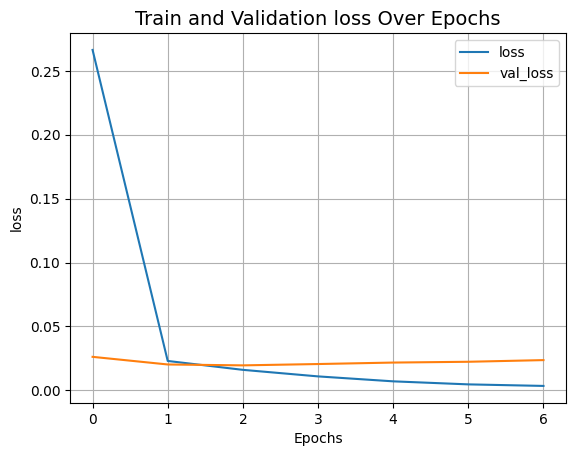

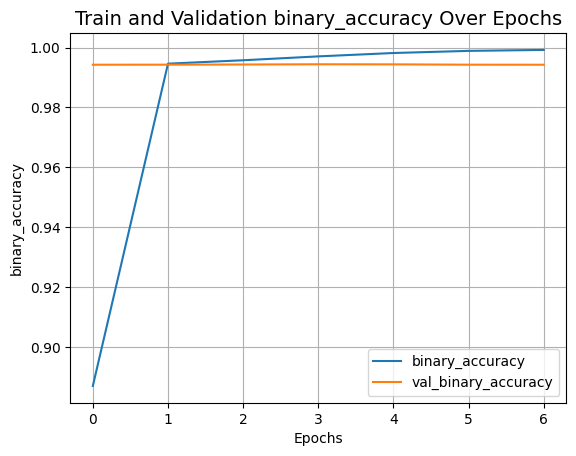

In [29]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

# Model Evaluation

In [31]:
test_results = model1.evaluate(test_dataset, verbose=0)
val_results = model1.evaluate(validation_dataset, verbose=0)

print(f"Binary accuracy on test set: {test_results[1] * 100:.2f}%")
print(f"AUC on test set: {test_results[2]:.4f}")

print(f"Binary accuracy on validation set: {val_results[1] * 100:.2f}%")
print(f"AUC on validation set: {val_results[2]:.4f}")


Binary accuracy on test set: 99.46%
AUC on test set: 0.9687
Binary accuracy on validation set: 99.43%
AUC on validation set: 0.9643


# Save Model and Text Vectorizer:

In [69]:
import os
import pickle
from tensorflow import keras


In [70]:
SAVE_DIR = "/content/drive/MyDrive/dataset/archive"
os.makedirs(SAVE_DIR, exist_ok=True)


In [35]:
model_path = os.path.join(SAVE_DIR, "shallow_mlp_model.keras")
model1.save(model_path)


In [36]:
saved_text_vectorizer_config = text_vectorizer.get_config()

vectorizer_config_path = os.path.join(
    SAVE_DIR, "text_vectorizer_config.pkl"
)

with open(vectorizer_config_path, "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)


In [37]:
vocab_path = os.path.join(SAVE_DIR, "text_vectorizer_vocab.pkl")

with open(vocab_path, "wb") as f:
    pickle.dump(text_vectorizer.get_vocabulary(), f)


In [74]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse

SAVE_DIR = "/content/drive/MyDrive/dataset/archive"

CSV_PATH = os.path.join(SAVE_DIR, "arxiv_data.csv")
VEC_CONFIG_PATH = os.path.join(SAVE_DIR, "text_vectorizer_config.pkl")
VEC_VOCAB_PATH  = os.path.join(SAVE_DIR, "text_vectorizer_vocab.pkl")
VEC_IDF_PATH    = os.path.join(SAVE_DIR, "text_vectorizer_idf_weights.pkl")

TEXT_COL = "summaries"
BATCH_SIZE = 5000  # increase if you have RAM

# --- Load config ---
with open(VEC_CONFIG_PATH, "rb") as f:
    config = pickle.load(f)

if config.get("output_mode") != "tf_idf":
    raise ValueError(f"Expected tf_idf vectorizer. Found: {config.get('output_mode')}")

# --- Load vocabulary ---
with open(VEC_VOCAB_PATH, "rb") as f:
    vocab_obj = pickle.load(f)

if isinstance(vocab_obj, list):
    vocab_list = vocab_obj
elif isinstance(vocab_obj, dict):
    vocab_list = vocab_obj.get("vocab") or vocab_obj.get("vocabulary")
    if vocab_list is None:
        raise ValueError(f"Unknown vocab dict keys: {list(vocab_obj.keys())}")
else:
    raise ValueError(f"Unsupported vocab type: {type(vocab_obj)}")

print("✅ Vocab length:", len(vocab_list))

# Build fixed-vocabulary CountVectorizer to compute DF
# token_pattern matches typical word tokens
vectorizer = CountVectorizer(
    vocabulary=vocab_list,
    lowercase=True
)

# --- Load dataset ---
df = pd.read_csv(CSV_PATH)
if TEXT_COL not in df.columns:
    raise ValueError(f"'{TEXT_COL}' not found. CSV columns={df.columns.tolist()}")

texts = df[TEXT_COL].astype(str).fillna("").values
N = len(texts)
print("✅ Documents:", N)

# --- Compute document frequency df(token) ---
df_counts = np.zeros(len(vocab_list), dtype=np.int64)

for start in range(0, N, BATCH_SIZE):
    batch = texts[start:start + BATCH_SIZE]
    X = vectorizer.transform(batch)  # sparse doc-term counts

    # convert to binary presence/absence per document
    X_bin = X.copy()
    X_bin.data = np.ones_like(X_bin.data)

    # df = number of docs where token appears
    batch_df = np.asarray(X_bin.sum(axis=0)).ravel().astype(np.int64)
    df_counts += batch_df

    if start % (BATCH_SIZE * 10) == 0:
        print(f"Processed {start}/{N}")

print("✅ DF computed.")

# --- Compute IDF weights (Keras-compatible) ---
# Keras TF-IDF uses smooth idf:
# idf = log(1 + N / (1 + df)) + 1
idf_weights = np.log(1.0 + (N / (1.0 + df_counts))) + 1.0
idf_weights = idf_weights.astype(np.float32)

print("✅ IDF shape:", idf_weights.shape)
print("IDF min/max:", float(idf_weights.min()), float(idf_weights.max()))

# --- Save IDF weights properly ---
with open(VEC_IDF_PATH, "wb") as f:
    pickle.dump(idf_weights, f)

print("✅ Saved IDF to:", VEC_IDF_PATH)
print("✅ IDF file size:", os.path.getsize(VEC_IDF_PATH), "bytes")


✅ Vocab length: 158706
✅ Documents: 51774
Processed 0/51774
Processed 50000/51774
✅ DF computed.
✅ IDF shape: (158706,)
IDF min/max: 1.6949094533920288 11.854662895202637
✅ Saved IDF to: /content/drive/MyDrive/dataset/archive/text_vectorizer_idf_weights.pkl
✅ IDF file size: 634987 bytes


In [75]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import numpy as np
import os
import pickle

SAVE_DIR = "/content/drive/MyDrive/dataset/archive"

MODEL_PATH = os.path.join(SAVE_DIR, "shallow_mlp_model.keras")
WEIGHTS_PATH = os.path.join(SAVE_DIR, "shallow_mlp_weights.weights.h5")

VEC_CONFIG_PATH = os.path.join(SAVE_DIR, "text_vectorizer_config.pkl")
VEC_VOCAB_PATH  = os.path.join(SAVE_DIR, "text_vectorizer_vocab.pkl")
VEC_IDF_PATH    = os.path.join(SAVE_DIR, "text_vectorizer_idf_weights.pkl")


def load_vectorizer():
    with open(VEC_CONFIG_PATH, "rb") as f:
        config = pickle.load(f)
    with open(VEC_VOCAB_PATH, "rb") as f:
        vocab_obj = pickle.load(f)
    with open(VEC_IDF_PATH, "rb") as f:
        idf_weights = pickle.load(f)

    # normalize vocab list
    if isinstance(vocab_obj, list):
        vocab_list = vocab_obj
    elif isinstance(vocab_obj, dict):
        vocab_list = vocab_obj.get("vocab") or vocab_obj.get("vocabulary")
        if vocab_list is None:
            raise ValueError(f"Unknown vocab dict keys: {list(vocab_obj.keys())}")
    else:
        raise ValueError(f"Unsupported vocab format: {type(vocab_obj)}")

    idf_weights = np.asarray(idf_weights, dtype=np.float32)

    vectorizer = TextVectorization(
        max_tokens=config.get("max_tokens"),
        ngrams=config.get("ngrams"),
        output_mode=config.get("output_mode"),
        standardize=config.get("standardize"),
        split=config.get("split"),
    )

    # ✅ REQUIRED for tf_idf
    vectorizer.set_vocabulary(vocab_list, idf_weights=idf_weights)
    return vectorizer


def load_model():
    # compile=False avoids optimizer warnings
    model = tf.keras.models.load_model(MODEL_PATH, compile=False)
    if os.path.exists(WEIGHTS_PATH):
        try:
            model.load_weights(WEIGHTS_PATH)
        except Exception as e:
            print("⚠️ weights present but not loaded:", e)
    return model


def predict_texts(texts):
    model = load_model()

    # try direct inference (if model includes vectorizer)
    try:
        return model.predict(tf.constant(texts), verbose=0)
    except Exception:
        pass

    # external vectorizer
    vec = load_vectorizer()
    x = vec(tf.constant(texts))
    return model.predict(x, verbose=0)


# ✅ Test prediction
texts = [
    "This paper proposes a transformer model for segmentation.",
    "A new reinforcement learning method for robotics is introduced."
]

preds = predict_texts(texts)
print("✅ Predictions shape:", preds.shape)
print(preds)

if preds.ndim == 2 and preds.shape[1] > 1:
    print("Predicted classes:", np.argmax(preds, axis=1))
elif preds.ndim == 2 and preds.shape[1] == 1:
    print("Predicted labels:", (preds[:, 0] >= 0.5).astype(int))


✅ Predictions shape: (2, 165)
[[4.23344864e-05 8.86199653e-01 6.85630918e-01 2.17735931e-01
  3.92854325e-02 1.36731076e-03 5.94578777e-03 2.50726799e-03
  5.60973072e-03 3.05630825e-03 7.65652279e-04 6.48467452e-04
  5.87671588e-04 8.34496313e-05 1.28068379e-04 9.01618405e-05
  1.98029127e-04 6.45410983e-05 4.50371386e-04 1.30452725e-04
  4.36038768e-04 2.13824547e-04 4.54227702e-05 7.26723374e-05
  1.86715057e-04 6.74894472e-05 2.86990049e-04 3.40732106e-04
  1.75385649e-05 1.03385159e-04 2.31613103e-05 8.68931675e-05
  2.14027987e-05 1.04318817e-04 1.76657864e-04 6.94313421e-05
  6.10773641e-05 2.55161838e-04 6.28263224e-05 1.42459146e-04
  1.87950573e-04 7.91511775e-05 6.12951844e-05 1.56533642e-04
  2.93123212e-05 4.42531236e-05 9.46064029e-05 3.77602628e-05
  7.96696622e-05 1.49113359e-04 4.51120432e-05 1.43075711e-04
  3.61527564e-05 9.80122641e-05 3.89934212e-05 5.11977123e-05
  3.56838718e-05 4.21576660e-05 9.47065928e-05 5.88705152e-05
  5.75172780e-05 4.84699121e-05 5.832362

In [76]:
ls /content/drive/MyDrive/dataset/archive/

arxiv_data_210930-054931.csv    text_vectorizer_config.pkl
arxiv_data.csv                  text_vectorizer_idf_weights.pkl
shallow_mlp_model.keras         text_vectorizer_vocab.pkl
shallow_mlp_weights.weights.h5


# Load Model and Text Vectorizer:

In [77]:
# =========================
# Imports
# =========================
import os
import pickle
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization

# =========================
# Base directory (Drive path)
# =========================
BASE_DIR = "/content/drive/MyDrive/dataset/archive"

# =========================
# Load the trained model
# =========================
model = keras.models.load_model(
    os.path.join(BASE_DIR, "shallow_mlp_model.keras")
)

# =========================
# Load TextVectorization configuration
# =========================
with open(os.path.join(BASE_DIR, "text_vectorizer_config.pkl"), "rb") as f:
    vectorizer_config = pickle.load(f)

text_vectorizer = TextVectorization.from_config(vectorizer_config)

# =========================
# Load vocabulary
# =========================
with open(os.path.join(BASE_DIR, "text_vectorizer_vocab.pkl"), "rb") as f:
    vocab = pickle.load(f)

# =========================
# Handle large vocabulary and decide on max_tokens
# =========================

# Option 1: Increase max_tokens to accommodate large vocabulary
# (Increase this if you want to keep all the tokens)
max_tokens = 160000  # Increase this value to handle your large vocabulary size

# Option 2: Truncate to the top N tokens (e.g., 10,000 tokens)
# max_tokens = 10000  # Use this if you want to limit vocabulary size

# Truncate the vocabulary to the max_tokens
vocab = vocab[:max_tokens]

# =========================
# Create TextVectorization layer
# =========================
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,  # Set max_tokens as required
    output_mode='int',  # Use 'int' mode (no TF-IDF)
    output_sequence_length=200  # Set your desired output sequence length
)

# Set the vocabulary
text_vectorizer.set_vocabulary(vocab)

# =========================
# Sanity check
# =========================
print("Model loaded successfully!")
print(f"Vocabulary size: {len(text_vectorizer.get_vocabulary())} (max_tokens={max_tokens})")

# =========================
# Optional: Test vectorization
# =========================
sample_text = "Sample abstract text to check vectorization."
vectorized_text = text_vectorizer([sample_text])
print("Vectorized sample text:", vectorized_text.numpy())


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model loaded successfully!
Vocabulary size: 158708 (max_tokens=160000)
Vectorized sample text: [[  384  3782   464     6 11797 47354     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0    

In [78]:
with open("/content/drive/MyDrive/dataset/archive/text_vectorizer_vocab.pkl", "rb") as f:
    vocab = pickle.load(f)


# Model Prediction

In [79]:
def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(loaded_vocab, hot_indices)

In [80]:
def predict_category(abstract, model, vectorizer, label_lookup):
    # Preprocess the abstract using the loaded text vectorizer
    preprocessed_abstract = vectorizer([abstract])

    # Make predictions using the loaded model
    predictions = model.predict(preprocessed_abstract)

    # Convert predictions to human-readable labels
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])

    return predicted_labels

In [82]:
# ===========================
# FULL WORKING COLAB SNIPPET
# Loads:
#  - shallow_mlp_model.keras
#  - shallow_mlp_weights.weights.h5 (optional)
#  - text_vectorizer_config.pkl
#  - text_vectorizer_vocab.pkl
#  - text_vectorizer_idf_weights.pkl
# Also builds label vocab from arxiv_data.csv -> "terms"
# Predicts categories for a new abstract.
# ===========================

import os
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from google.colab import drive

# ---------------------------
# 1) Mount Drive + Paths
# ---------------------------


BASE_DIR = "/content/drive/MyDrive/dataset/archive"

CSV_PATH      = os.path.join(BASE_DIR, "arxiv_data.csv")
MODEL_PATH    = os.path.join(BASE_DIR, "shallow_mlp_model.keras")
WEIGHTS_PATH  = os.path.join(BASE_DIR, "shallow_mlp_weights.weights.h5")

VEC_CONFIG_PATH = os.path.join(BASE_DIR, "text_vectorizer_config.pkl")
VEC_VOCAB_PATH  = os.path.join(BASE_DIR, "text_vectorizer_vocab.pkl")
VEC_IDF_PATH    = os.path.join(BASE_DIR, "text_vectorizer_idf_weights.pkl")

print("✅ Files in BASE_DIR:", os.listdir(BASE_DIR))


# ---------------------------
# 2) Load Vectorizer (TF-IDF)
# ---------------------------
def load_text_vectorizer_tf_idf(vec_config_path, vec_vocab_path, vec_idf_path):
    # config
    with open(vec_config_path, "rb") as f:
        cfg = pickle.load(f)

    if cfg.get("output_mode") != "tf_idf":
        raise ValueError(f"Expected output_mode='tf_idf', got: {cfg.get('output_mode')}")

    # vocab
    with open(vec_vocab_path, "rb") as f:
        vocab_obj = pickle.load(f)

    if isinstance(vocab_obj, list):
        vocab_list = vocab_obj
    elif isinstance(vocab_obj, dict):
        vocab_list = vocab_obj.get("vocab") or vocab_obj.get("vocabulary")
        if vocab_list is None:
            raise ValueError(f"Unknown vocab dict keys: {list(vocab_obj.keys())}")
    else:
        raise ValueError(f"Unsupported vocab type: {type(vocab_obj)}")

    # idf
    if (not os.path.exists(vec_idf_path)) or (os.path.getsize(vec_idf_path) <= 0):
        raise FileNotFoundError(
            f"IDF weights file is missing/empty: {vec_idf_path}\n"
            f"Fix: regenerate IDF weights and save properly."
        )

    with open(vec_idf_path, "rb") as f:
        idf_weights = pickle.load(f)

    idf_weights = np.asarray(idf_weights, dtype=np.float32)

    # create vectorizer
    tv = TextVectorization(
        max_tokens=cfg.get("max_tokens"),
        ngrams=cfg.get("ngrams"),
        output_mode="tf_idf",
        standardize=cfg.get("standardize"),
        split=cfg.get("split"),
    )

    # IMPORTANT: pass idf_weights
    tv.set_vocabulary(vocab_list, idf_weights=idf_weights)

    return tv


text_vectorizer_for_prediction = load_text_vectorizer_tf_idf(
    VEC_CONFIG_PATH, VEC_VOCAB_PATH, VEC_IDF_PATH
)
print("✅ TextVectorization loaded (TF-IDF).")


# ---------------------------
# 3) Load Model
# ---------------------------
# compile=False avoids optimizer mismatch warnings (safe for inference)
model = tf.keras.models.load_model(MODEL_PATH, compile=False)

# Optional: load extra weights if needed
if os.path.exists(WEIGHTS_PATH):
    try:
        model.load_weights(WEIGHTS_PATH)
        print("✅ Weights loaded:", WEIGHTS_PATH)
    except Exception as e:
        print("⚠️ Weights file exists but not loaded (OK):", e)

print("✅ Model loaded.")


# ---------------------------
# 4) Build LABEL vocab from arxiv_data.csv (terms column)
# ---------------------------
df = pd.read_csv(CSV_PATH)

if "terms" not in df.columns:
    raise ValueError(f"'terms' column not found in {CSV_PATH}. Columns: {df.columns.tolist()}")

# terms assumed like: "cs.AI, cs.LG, stat.ML"
all_terms = df["terms"].astype(str).fillna("").str.split(",")

label_vocab = sorted(set(
    t.strip() for row in all_terms for t in row if t.strip()
))

loaded_vocab = np.array(label_vocab)
print("✅ Label vocab size:", len(loaded_vocab))


# ---------------------------
# 5) Prediction helpers
# ---------------------------
def predict_category(text, model, vectorizer, label_vocab, top_k=10, threshold=0.5):
    """
    Returns sorted list of (label, score).
    Works for multi-label outputs.
    """
    x = vectorizer(tf.constant([text]))
    pred = model.predict(x, verbose=0)[0]  # shape: (num_labels,)

    # threshold selection
    idx = np.where(pred >= threshold)[0]

    # fallback -> top_k
    if len(idx) == 0:
        idx = np.argsort(pred)[-top_k:][::-1]

    results = [(label_vocab[i], float(pred[i])) for i in idx]
    results.sort(key=lambda x: x[1], reverse=True)
    return results


# ---------------------------
# 6) Run Prediction
# ---------------------------
new_abstract = "This paper introduces a transformer-based approach for segmentation and classification."

predicted_categories = predict_category(
    text=new_abstract,
    model=model,
    vectorizer=text_vectorizer_for_prediction,
    label_vocab=loaded_vocab,
    top_k=10,
    threshold=0.5
)

print("\n✅ Predicted Categories:")
for label, score in predicted_categories:
    print(f"{label:20s}  {score:.4f}")


✅ Files in BASE_DIR: ['arxiv_data.csv', 'arxiv_data_210930-054931.csv', 'shallow_mlp_model.keras', 'text_vectorizer_config.pkl', 'text_vectorizer_vocab.pkl', 'shallow_mlp_weights.weights.h5', 'text_vectorizer_idf_weights.pkl']
✅ TextVectorization loaded (TF-IDF).
✅ Weights loaded: /content/drive/MyDrive/dataset/archive/shallow_mlp_weights.weights.h5
✅ Model loaded.
✅ Label vocab size: 1546

✅ Predicted Categories:
'00']                 0.9518


In [84]:
# ==========================================================
# ✅ OVERALL WORKING COLAB SNIPPET (END-TO-END)
# Loads:
#  - shallow_mlp_model.keras
#  - shallow_mlp_weights.weights.h5 (optional)
#  - text_vectorizer_config.pkl
#  - text_vectorizer_vocab.pkl
#  - text_vectorizer_idf_weights.pkl
# Builds label vocab from arxiv_data.csv -> "terms"
# Predicts top categories for any new abstract text
# ==========================================================

import os
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from google.colab import drive


# ---------------------------
# 1) Mount Drive + Paths
# ---------------------------


BASE_DIR = "/content/drive/MyDrive/dataset/archive"

CSV_PATH      = os.path.join(BASE_DIR, "arxiv_data.csv")
MODEL_PATH    = os.path.join(BASE_DIR, "shallow_mlp_model.keras")
WEIGHTS_PATH  = os.path.join(BASE_DIR, "shallow_mlp_weights.weights.h5")

VEC_CONFIG_PATH = os.path.join(BASE_DIR, "text_vectorizer_config.pkl")
VEC_VOCAB_PATH  = os.path.join(BASE_DIR, "text_vectorizer_vocab.pkl")
VEC_IDF_PATH    = os.path.join(BASE_DIR, "text_vectorizer_idf_weights.pkl")

print("✅ Files in BASE_DIR:", os.listdir(BASE_DIR))


# ---------------------------
# 2) Load TextVectorization (TF-IDF)
# ---------------------------
def load_text_vectorizer_tf_idf(vec_config_path, vec_vocab_path, vec_idf_path):
    with open(vec_config_path, "rb") as f:
        cfg = pickle.load(f)

    if cfg.get("output_mode") != "tf_idf":
        raise ValueError(f"Expected output_mode='tf_idf', got: {cfg.get('output_mode')}")

    # load vocabulary
    with open(vec_vocab_path, "rb") as f:
        vocab_obj = pickle.load(f)

    if isinstance(vocab_obj, list):
        vocab_list = vocab_obj
    elif isinstance(vocab_obj, dict):
        vocab_list = vocab_obj.get("vocab") or vocab_obj.get("vocabulary")
        if vocab_list is None:
            raise ValueError(f"Unknown vocab dict keys: {list(vocab_obj.keys())}")
    else:
        raise ValueError(f"Unsupported vocab type: {type(vocab_obj)}")

    # load IDF weights
    if (not os.path.exists(vec_idf_path)) or (os.path.getsize(vec_idf_path) <= 0):
        raise FileNotFoundError(
            f"IDF weights file missing/empty: {vec_idf_path}\n"
            f"Fix: regenerate IDF correctly."
        )

    with open(vec_idf_path, "rb") as f:
        idf_weights = pickle.load(f)

    idf_weights = np.asarray(idf_weights, dtype=np.float32)

    # create vectorizer with correct config
    tv = TextVectorization(
        max_tokens=cfg.get("max_tokens"),
        ngrams=cfg.get("ngrams"),
        output_mode="tf_idf",
        standardize=cfg.get("standardize"),
        split=cfg.get("split"),
    )

    # ✅ restore vocabulary + IDF
    tv.set_vocabulary(vocab_list, idf_weights=idf_weights)
    return tv


text_vectorizer_for_prediction = load_text_vectorizer_tf_idf(
    VEC_CONFIG_PATH, VEC_VOCAB_PATH, VEC_IDF_PATH
)
print("✅ TF-IDF Vectorizer loaded successfully.")


# ---------------------------
# 3) Load Trained Model
# ---------------------------
# compile=False avoids optimizer mismatch warning and is correct for inference
model = tf.keras.models.load_model(MODEL_PATH, compile=False)

# optional weights load
if os.path.exists(WEIGHTS_PATH):
    try:
        model.load_weights(WEIGHTS_PATH)
        print("✅ Extra weights loaded:", WEIGHTS_PATH)
    except Exception as e:
        print("⚠️ weights file exists but not loaded (OK):", e)

print("✅ Model loaded successfully.")


# ---------------------------
# 4) Build label vocabulary from CSV ("terms")
# ---------------------------
df = pd.read_csv(CSV_PATH)

if "terms" not in df.columns:
    raise ValueError(f"'terms' column not found in {CSV_PATH}. Columns: {df.columns.tolist()}")

# terms: expected like "cs.AI, cs.LG, stat.ML"
all_terms = df["terms"].astype(str).fillna("").str.split(",")

label_vocab = sorted(set(
    t.strip() for row in all_terms for t in row if t.strip()
))

loaded_vocab = np.array(label_vocab)
print("✅ Label vocab size:", len(loaded_vocab))


# ---------------------------
# 5) Prediction helper
# ---------------------------
def predict_category(text, model, vectorizer, label_vocab, top_k=10, threshold=0.5):
    """
    Multi-label prediction.
    Returns sorted list of (label, score)
    """
    x = vectorizer(tf.constant([text]))
    pred = model.predict(x, verbose=0)[0]   # shape: (num_labels,)

    # pick by threshold
    idx = np.where(pred >= threshold)[0]

    # fallback: if nothing >= threshold -> return top_k
    if len(idx) == 0:
        idx = np.argsort(pred)[-top_k:][::-1]

    results = [(label_vocab[i], float(pred[i])) for i in idx]
    results.sort(key=lambda x: x[1], reverse=True)
    return results


# ---------------------------
# 6) Example Usage
# ---------------------------
new_abstract = """Deep networks and decision forests (such as random forests and gradient
boosted trees) are the leading machine learning methods for structured and
tabular data, respectively. Many papers have empirically compared large numbers
of classifiers on one or two different domains..."""

predicted_categories = predict_category(
    text=new_abstract,
    model=model,
    vectorizer=text_vectorizer_for_prediction,
    label_vocab=loaded_vocab,
    top_k=10,
    threshold=0.5
)

print("\n✅ Predicted Categories:")
for label, score in predicted_categories:
    print(f"{label:20s}  {score:.4f}")


# ---------------------------
# 7) Optional Aliases (if you still use old names)
# ---------------------------
loaded_model = model
loaded_text_vectorizer = text_vectorizer_for_prediction


✅ Files in BASE_DIR: ['arxiv_data.csv', 'arxiv_data_210930-054931.csv', 'shallow_mlp_model.keras', 'text_vectorizer_config.pkl', 'text_vectorizer_vocab.pkl', 'shallow_mlp_weights.weights.h5', 'text_vectorizer_idf_weights.pkl']
✅ TF-IDF Vectorizer loaded successfully.
✅ Extra weights loaded: /content/drive/MyDrive/dataset/archive/shallow_mlp_weights.weights.h5
✅ Model loaded successfully.
✅ Label vocab size: 1546

✅ Predicted Categories:
'00-02']              0.9828
'00B25']              0.7158


In [ ]:
# great resutls...................................

# =======Section 2========

# 2 Recommendation System

In [85]:
arxiv_data.drop(columns = ["terms","abstracts"], inplace = True)

In [86]:
arxiv_data.drop_duplicates(inplace= True)
arxiv_data.reset_index(drop= True,inplace = True)

In [87]:
pd.set_option('display.max_colwidth', None)
arxiv_data

,titles
0,Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
1,Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
2,Power up! Robust Graph Convolutional Network via Graph Powering
3,Releasing Graph Neural Networks with Differential Privacy Guarantees
4,Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
...,...
41100,An experimental study of graph-based semi-supervised classification with additional node information
41101,Bayesian Differential Privacy through Posterior Sampling
41102,Mining Spatio-temporal Data on Industrialization from Historical Registries
41103,Wav2Letter: an End-to-End ConvNet-based Speech Recognition System


# Sentence Transformers

In [ ]:
# !pip install -U -q sentence-transformers

In [88]:
# This imports the SentenceTransformer class from the Sentence Transformers library.
from sentence_transformers import SentenceTransformer, util
# we load all-MiniLM-L6-v2, which is a MiniLM model fine tuned on a large dataset of over
# 1 billion training pairs.
#This initializes the 'all-MiniLM-L6-v2' model from Sentence Transformers.
# This model is capable of encoding sentences into fixed-size vectors (embeddings).
model = SentenceTransformer('all-MiniLM-L6-v2')
#Our sentences we like to encode
sentences = arxiv_data['titles']
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

"""
The embeddings can be used for various natural language processing (NLP) tasks,
such as similarity search, clustering
"""

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

'\nThe embeddings can be used for various natural language processing (NLP) tasks, \nsuch as similarity search, clustering\n'

In [ ]:
embeddings

# Why select all-MiniLM-L6-v2?

All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs. Source

Its small in size 80 MB with good performance.

# Print the embeddings

In [89]:
c = 0
#This loop iterates over pairs of sentences and their corresponding embeddings.
#zip is used to iterate over both lists simultaneously.
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding length:", len(embedding)) # list of floats
    print("")
    # Breaks out of the loop after printing information for the first 5 sentences.
    if c >=5:
        break
    c +=1

Sentence: Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
Embedding length: 384

Sentence: Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
Embedding length: 384

Sentence: Power up! Robust Graph Convolutional Network via Graph Powering
Embedding length: 384

Sentence: Releasing Graph Neural Networks with Differential Privacy Guarantees
Embedding length: 384

Sentence: Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
Embedding length: 384

Sentence: Lifelong Graph Learning
Embedding length: 384



# Save files

In [90]:
# ✅ Save embeddings/sentences/model into Google Drive in Colab

import os
import pickle
from google.colab import drive

drive.mount("/content/drive")

# ✅ Change folder name if you want
DRIVE_DIR = "/content/drive/MyDrive/dataset/archive/saved_pickles"
os.makedirs(DRIVE_DIR, exist_ok=True)

# 1) Save embeddings
with open(os.path.join(DRIVE_DIR, "embeddings.pkl"), "wb") as f:
    pickle.dump(embeddings, f)

# 2) Save sentences
with open(os.path.join(DRIVE_DIR, "sentences.pkl"), "wb") as f:
    pickle.dump(sentences, f)

# 3) Save recommendation model
with open(os.path.join(DRIVE_DIR, "rec_model.pkl"), "wb") as f:
    pickle.dump(model, f)

print("✅ Saved files to:", DRIVE_DIR)
print("Files:", os.listdir(DRIVE_DIR))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved files to: /content/drive/MyDrive/dataset/archive/saved_pickles
Files: ['embeddings.pkl', 'sentences.pkl', 'rec_model.pkl']


# Recommendation for similar papers

In [92]:
import os
import pickle
from google.colab import drive

drive.mount("/content/drive")

DRIVE_DIR = "/content/drive/MyDrive/dataset/archive/saved_pickles"

embeddings = pickle.load(open(os.path.join(DRIVE_DIR, "embeddings.pkl"), "rb"))
sentences  = pickle.load(open(os.path.join(DRIVE_DIR, "sentences.pkl"), "rb"))
rec_model  = pickle.load(open(os.path.join(DRIVE_DIR, "rec_model.pkl"), "rb"))

print("✅ Loaded successfully!")
print("Embeddings:", type(embeddings))
print("Sentences:", type(sentences), "len:", len(sentences))
print("Model:", type(rec_model))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded successfully!
Embeddings: <class 'numpy.ndarray'>
Sentences: <class 'pandas.core.series.Series'> len: 41105
Model: <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>


In [93]:
import torch

def recommendation(input_paper):
    # Calculate cosine similarity scores between the embeddings of input_paper and all papers in the dataset.
    cosine_scores = util.cos_sim(embeddings, rec_model.encode(input_paper))

    # Get the indices of the top-k most similar papers based on cosine similarity.
    top_similar_papers = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

    # Retrieve the titles of the top similar papers.
    papers_list = []
    for i in top_similar_papers.indices:
        papers_list.append(sentences[i.item()])

    return papers_list


In [94]:
# exampel usage 1: (use this paper as input (Attention is All you Need))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likequantum computer
We recommend to read this paper............
Quantum Fair Machine Learning
Quantum Algorithms for Structured Prediction
Free energy-based reinforcement learning using a quantum processor
The Quantum Version Of Classification Decision Tree Constructing Algorithm C5.0
An Online Algorithm for Maximum-Likelihood Quantum State Tomography


In [95]:
# exampel usage 2: (use this paper as input (BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you liketime
We recommend to read this paper............
Time Adaptive Reinforcement Learning
Signs in time: Encoding human motion as a temporal image
Learnability of Timescale Graphical Event Models
Plotting time: On the usage of CNNs for time series classification
Self-attention with Functional Time Representation Learning


In [96]:
# exampel usage 3: (use this paper as input (Review of deep learning: concepts, CNN architectures, challenges, applications, future directions))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likehell
We recommend to read this paper............
Image-to-Image Translation with Conditional Adversarial Networks
The 2021 Image Similarity Dataset and Challenge
DiCE: The Infinitely Differentiable Monte-Carlo Estimator
Text-to-Image-to-Text Translation using Cycle Consistent Adversarial Networks
The Benchmark Lottery


In [97]:
# install this versions
import sentence_transformers
import tensorflow
import torch
print(torch.__version__)
print(sentence_transformers.__version__)
print(tensorflow.__version__)

2.9.0+cu126
5.2.0
2.19.0


In [99]:
!ls /content/drive/MyDrive/dataset/archive/saved_pickles
!ls /content/drive/MyDrive/dataset/archive


embeddings.pkl	rec_model.pkl  sentences.pkl
arxiv_data_210930-054931.csv  shallow_mlp_weights.weights.h5
arxiv_data.csv		      text_vectorizer_config.pkl
saved_pickles		      text_vectorizer_idf_weights.pkl
shallow_mlp_model.keras       text_vectorizer_vocab.pkl
